# Imports and helper functions

In [18]:
from neurolib.models.multimodel import ThalamicNode, MultiModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.models.thalamus import ThalamicMassModel
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams['figure.figsize'] = [20, 10]

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# ===================== Set ICs ====================
def generateNonRandomICsThalamus(n_nodes_thal):
    V_t_init = -70 * np.ones((n_nodes_thal, 1))
    V_r_init = -70 * np.ones((n_nodes_thal, 1))
    Q_t_init = 0 * np.ones((n_nodes_thal, 1))
    Q_r_init = 0 * np.ones((n_nodes_thal, 1))
    Ca_init = np.array(2.4e-4)
    h_T_t_init = np.array(0.0)
    h_T_r_init = np.array(0.0)
    m_h1_init = np.array(0.0)
    m_h2_init = np.array(0.0)
    s_et_init = np.array(0.0)
    s_gt_init = np.array(0.0)
    s_er_init = np.array(0.0)
    s_gr_init = np.array(0.0)
    ds_et_init = np.array(0.0)
    ds_gt_init = np.array(0.0)
    ds_er_init = np.array(0.0)
    ds_gr_init = np.array(0.0)
    
    return (
        V_t_init,
        V_r_init,
        Q_t_init,
        Q_r_init,
        Ca_init,
        h_T_t_init,
        h_T_r_init,
        m_h1_init,
        m_h2_init,
        s_et_init,
        s_gt_init,
        s_er_init,
        s_gr_init,
        ds_et_init,
        ds_gt_init,
        ds_er_init,
        ds_gr_init,
    )

# ============ Naming map multi->native ============
name_map_thal = {
    'THLMnode_0.TCR_0.tau': 'tau',
    'THLMnode_0.TCR_0.Q_max': 'Q_max',
    'THLMnode_0.TCR_0.theta': 'theta',
    'THLMnode_0.TCR_0.sigma': 'sigma',
    'THLMnode_0.TCR_0.C1': 'C1',
    'THLMnode_0.TCR_0.C_m': 'C_m',
    'THLMnode_0.TCR_0.gamma_e': 'gamma_e',
    'THLMnode_0.TCR_0.gamma_r': 'gamma_r',
    'THLMnode_0.TCR_0.g_L': 'g_L',
    'THLMnode_0.TCR_0.g_GABA': 'g_GABA',
    'THLMnode_0.TCR_0.g_AMPA': 'g_AMPA',
    'THLMnode_0.TCR_0.g_LK': 'g_LK',
    'THLMnode_0.TCR_0.g_T': 'g_T_t',
    'THLMnode_0.TCR_0.g_h': 'g_h',
    'THLMnode_0.TCR_0.E_AMPA': 'E_AMPA',
    'THLMnode_0.TCR_0.E_GABA': 'E_GABA',
    'THLMnode_0.TCR_0.E_L': 'E_L',
    'THLMnode_0.TCR_0.E_K': 'E_K',
    'THLMnode_0.TCR_0.E_Ca': 'E_Ca',
    'THLMnode_0.TCR_0.E_h': 'E_h',
    'THLMnode_0.TCR_0.alpha_Ca': 'alpha_Ca',
    'THLMnode_0.TCR_0.tau_Ca': 'tau_Ca',
    'THLMnode_0.TCR_0.Ca_0': 'Ca_0',
    'THLMnode_0.TCR_0.k1': 'k1',
    'THLMnode_0.TCR_0.k2': 'k2',
    'THLMnode_0.TCR_0.k3': 'k3',
    'THLMnode_0.TCR_0.k4': 'k4',
    'THLMnode_0.TCR_0.n_P': 'n_P',
    'THLMnode_0.TCR_0.g_inc': 'g_inc',
    'THLMnode_0.TCR_0.ext_current': 'ext_current_t',
    'THLMnode_0.TCR_0.lambda': None,
    'THLMnode_0.TCR_0.input_0.type': None,
    'THLMnode_0.TCR_0.input_0.mu': None,
    'THLMnode_0.TCR_0.input_0.sigma': None,
    'THLMnode_0.TCR_0.input_0.tau': None,
    'THLMnode_0.TCR_0.input_0.n': None,
    'THLMnode_0.TCR_0.input_0.seed': None,
    'THLMnode_0.TRN_1.tau': 'tau',
    'THLMnode_0.TRN_1.Q_max': 'Q_max',
    'THLMnode_0.TRN_1.theta': 'theta',
    'THLMnode_0.TRN_1.sigma': 'sigma',
    'THLMnode_0.TRN_1.C1': 'C1',
    'THLMnode_0.TRN_1.C_m': 'C_m',
    'THLMnode_0.TRN_1.gamma_e': 'gamma_e',
    'THLMnode_0.TRN_1.gamma_r': 'gamma_r',
    'THLMnode_0.TRN_1.g_L': 'g_L',
    'THLMnode_0.TRN_1.g_GABA': 'g_GABA',
    'THLMnode_0.TRN_1.g_AMPA': 'g_AMPA',
    'THLMnode_0.TRN_1.g_LK': None,  # `g_LK` is already mapped by `THLMnode_0.TCR_0.g_LK`
    'THLMnode_0.TRN_1.g_T': 'g_T_r',
    'THLMnode_0.TRN_1.E_AMPA': 'E_AMPA',
    'THLMnode_0.TRN_1.E_GABA': 'E_GABA',
    'THLMnode_0.TRN_1.E_L': 'E_L',
    'THLMnode_0.TRN_1.E_K': 'E_K',
    'THLMnode_0.TRN_1.E_Ca': 'E_Ca',
    'THLMnode_0.TRN_1.ext_current': 'ext_current_r',
    'THLMnode_0.TRN_1.lambda': None,
    'THLMnode_0.TRN_1.input_0.type': None,
    'THLMnode_0.TRN_1.input_0.n': None,
    'THLMnode_0.TRN_1.input_0.seed': None,
    'THLMnode_0.local_connectivity': None,
    'THLMnode_0.local_delays': None,
    'duration': 'duration',
    'dt': 'dt',
    'seed': 'seed',
    'backend': None,
    'name': 'name',
    'description': 'description',
    'N': None,
    'Cmat': None,
    'sampling_dt': None, 
}


# ==================== Plotting ====================
def plotModels(
    model_list,
    model_name_list,
    outputs=["rates_exc", "rates_inh", "IA", "Q_t", "Q_r"],
    t_start=0,
    t_end=-1,
    color_list=["g", "r", "b"],
    linestyles=["-"],
):
    """
    Plots native models.
    """

    n_outputs = len(outputs)

    fig, axs = plt.subplots(n_outputs)

    for idx, output in enumerate(outputs):

        ax = axs[idx]
        ax.set_title(output)

        for idx_model, model in enumerate(model_list):
            color = color_list[idx_model % len(color_list)]
            label = model_name_list[idx_model]
            linestyle = linestyles[idx_model % len(linestyles)]
            ax.plot(
                model["t"][t_start:t_end],
                model[output].T[t_start:t_end],
                lw=2,
                c=color,
                label=label,
                linestyle=linestyle,
                alpha=0.7
            )
            ax.legend(loc="upper right")

# Create models

In [20]:
thal_multi = MultiModel.init_node(ThalamicNode())
thal_multi.model_instance[0].noise_input = [ZeroInput()]
thal_multi.model_instance[1].noise_input = [ZeroInput()]

thal_native = ThalamicMassModel()

# Ensure parameters are the same

In [21]:
# Set multimodel params 
thal_multi.params["backend"] = "numba"
thal_multi.params["sampling_dt"] = thal_multi.params["dt"]
thal_multi.params["duration"] = 40000

# Copy parameters from multi to native
for name_multi, val_multi in thal_multi.params.items():
    
    name_native = name_map_thal[name_multi]
    
    # Do nothing if multi name has no corresponding native name
    if name_native is None:
        continue
        
    thal_native.params[name_native] = val_multi

# Set ICs native

In [22]:
(
thal_native.params["V_t_init"],
thal_native.params["V_r_init"],
thal_native.params["Q_t_init"],
thal_native.params["Q_r_init"],
thal_native.params["Ca_init"],
thal_native.params["h_T_t_init"],
thal_native.params["h_T_r_init"],
thal_native.params["m_h1_init"],
thal_native.params["m_h2_init"],
thal_native.params["s_et_init"],
thal_native.params["s_gt_init"],
thal_native.params["s_er_init"],
thal_native.params["s_gr_init"],
thal_native.params["ds_et_init"],
thal_native.params["ds_gt_init"],
thal_native.params["ds_er_init"],
thal_native.params["ds_gr_init"] ) = generateNonRandomICsThalamus(1)

# Run with `g_LK = 0.018`

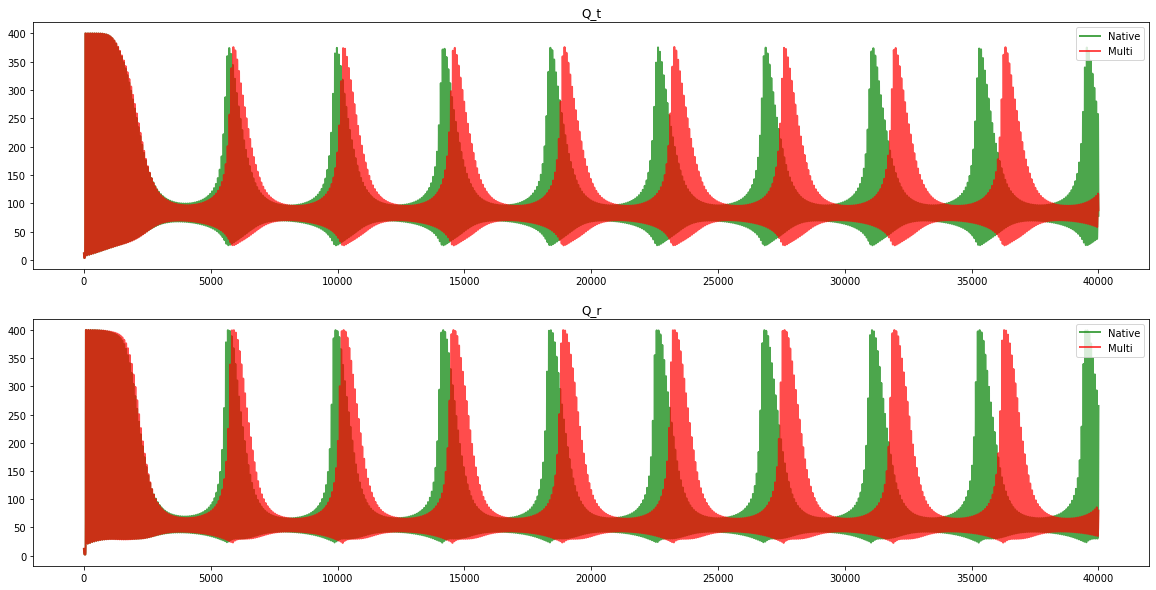

In [23]:
thal_multi.params["THLMnode_0.TCR_0.g_LK"] = 0.018
thal_multi.params["THLMnode_0.TRN_1.g_LK"] = 0.018

thal_native.params["g_LK"] = 0.018

# Run models
thal_native.run()
thal_multi.run()

# Convert multi output to same units as native
outputs_multi_thal = {}
outputs_multi_thal["t"] = thal_multi["t"] * 1000
outputs_multi_thal["Q_t"] = thal_multi["r_mean_EXC"][0] * 1000
outputs_multi_thal["Q_r"] = thal_multi["r_mean_INH"][0] * 1000

plotModels([thal_native, outputs_multi_thal], ["Native", "Multi"], outputs=["Q_t", "Q_r"])

# Run with `g_LK = 0.032`

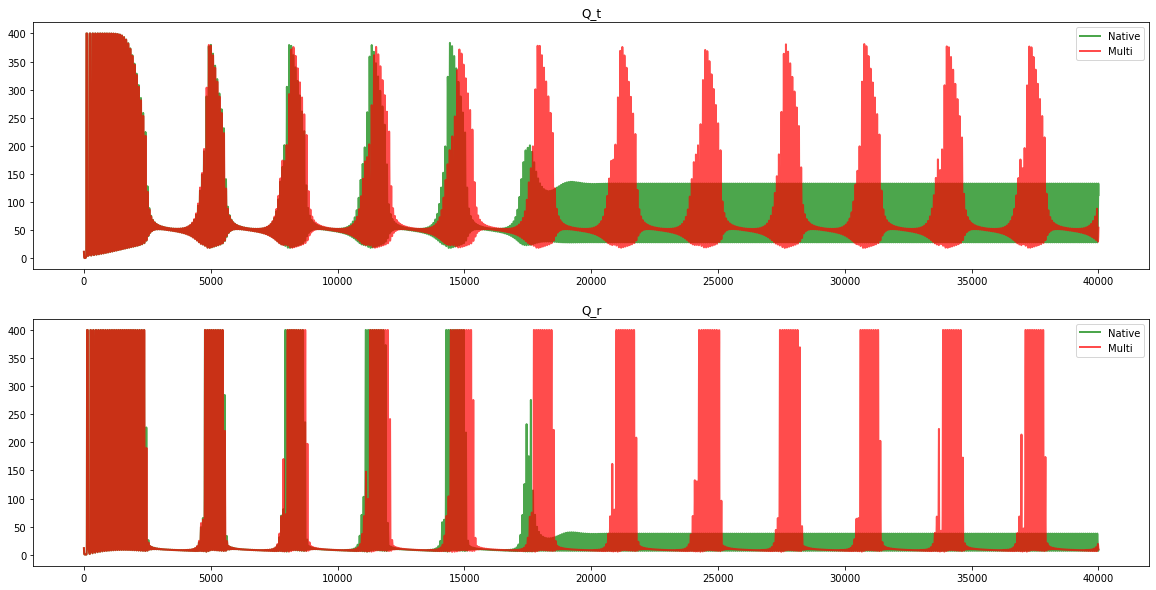

In [24]:
thal_multi.params["THLMnode_0.TCR_0.g_LK"] = 0.032
thal_multi.params["THLMnode_0.TRN_1.g_LK"] = 0.032

thal_native.params["g_LK"] = 0.032

# Run models
thal_native.run()
thal_multi.run()

# Convert multi output to same units as native
outputs_multi_thal = {}
outputs_multi_thal["t"] = thal_multi["t"] * 1000
outputs_multi_thal["Q_t"] = thal_multi["r_mean_EXC"][0] * 1000
outputs_multi_thal["Q_r"] = thal_multi["r_mean_INH"][0] * 1000

plotModels([thal_native, outputs_multi_thal], ["Native", "Multi"], outputs=["Q_t", "Q_r"])

# Sanity checks parameters

In [33]:
# Check which multi parameter names haven no corresponding native name
for name_multi, val_multi in thal_multi.params.items():
    
    name_native = name_map_thal[name_multi]
    if name_native is None:
        print(f"No corresponding native parameter to {name_multi}")


# Check that THLMnode_0.local_connectivity == [[0, N_tr], [N_rt, N_rr]]
print(    
thal_multi.params["THLMnode_0.local_connectivity"][0,0] == 0 \
and thal_multi.params["THLMnode_0.local_connectivity"][0,1] == thal_native.params["N_tr"] \
and thal_multi.params["THLMnode_0.local_connectivity"][1,0] == thal_native.params["N_rt"] \
and thal_multi.params["THLMnode_0.local_connectivity"][1,1] == thal_native.params["N_rr"]
)

No corresponding native parameter to THLMnode_0.TCR_0.lambda
No corresponding native parameter to THLMnode_0.TCR_0.input_0.type
No corresponding native parameter to THLMnode_0.TCR_0.input_0.mu
No corresponding native parameter to THLMnode_0.TCR_0.input_0.sigma
No corresponding native parameter to THLMnode_0.TCR_0.input_0.tau
No corresponding native parameter to THLMnode_0.TCR_0.input_0.n
No corresponding native parameter to THLMnode_0.TCR_0.input_0.seed
No corresponding native parameter to THLMnode_0.TRN_1.g_LK
No corresponding native parameter to THLMnode_0.TRN_1.lambda
No corresponding native parameter to THLMnode_0.TRN_1.input_0.type
No corresponding native parameter to THLMnode_0.TRN_1.input_0.n
No corresponding native parameter to THLMnode_0.TRN_1.input_0.seed
No corresponding native parameter to THLMnode_0.local_connectivity
No corresponding native parameter to THLMnode_0.local_delays
No corresponding native parameter to backend
No corresponding native parameter to N
No correspon

In [43]:
# Check that parameters not in the name mapping are okay

native_params_okay = {
    # Set manually
    "N_tr",
    "N_rt",
    "N_rr",
    # Already correct value
    "N",
    "Cmat",
    "lengthMat",
    "d_phi",  # (=0), no noise
}

# See which parameters not taken care of mirroring above
native_in_mapping = name_map_thal.values()  # native parameters with corresponding multi
native_missing_in_mapping = thal_native.params.keys() - native_in_mapping  # native parameters without corresponding multi
print("The parameters not taken care of yet are all ICs:")
native_missing_in_mapping - native_params_okay

The parameters not taken care of yet are all ICs:


{'Ca_init',
 'Q_r_init',
 'Q_t_init',
 'V_r_init',
 'V_t_init',
 'ds_er_init',
 'ds_et_init',
 'ds_gr_init',
 'ds_gt_init',
 'h_T_r_init',
 'h_T_t_init',
 'm_h1_init',
 'm_h2_init',
 's_er_init',
 's_et_init',
 's_gr_init',
 's_gt_init'}